### DATA PREPARATION

In [1]:
import pandas as pd
# Read the Excel file into a DataFrame
data = pd.read_excel('rfm_superstore.xlsx')

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Calculating the Missing Values % contribution in DF

df_null = round(100*(data.isnull().sum())/len(data), 2)
df_null

Recency         0.00
Frequency       0.00
Monetary        0.00
R_Tertile       0.00
F_Tertile       0.00
M_Tertile       0.00
RFM_Score       0.00
segment_name    3.78
dtype: float64

In [3]:
data.columns

Index(['Recency', 'Frequency', 'Monetary', 'R_Tertile', 'F_Tertile',
       'M_Tertile', 'RFM_Score', 'segment_name'],
      dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 793 entries, 0 to 792
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Recency       793 non-null    int64  
 1   Frequency     793 non-null    int64  
 2   Monetary      793 non-null    float64
 3   R_Tertile     793 non-null    int64  
 4   F_Tertile     793 non-null    int64  
 5   M_Tertile     793 non-null    int64  
 6   RFM_Score     793 non-null    int64  
 7   segment_name  763 non-null    object 
dtypes: float64(1), int64(6), object(1)
memory usage: 49.7+ KB


In [5]:
data = data.drop_duplicates()

In [6]:
data

,Recency,Frequency,Monetary,R_Tertile,F_Tertile,M_Tertile,RFM_Score,segment_name
0,184,5,5008.480,1,1,3,113,ABOUT TO SLEEP
1,19,9,718.000,3,3,2,332,LOYAL
2,259,4,76.502,1,1,1,111,LOST CUSTOMER
3,55,6,1064.158,2,2,2,222,AVERAGE
4,415,3,283.316,1,1,1,111,LOST CUSTOMER
...,...,...,...,...,...,...,...,...
788,43,11,1030.072,2,3,2,232,NaN
789,4,5,4942.606,3,1,3,313,RECENT CUSTOMER
790,9,8,5059.904,3,3,3,333,CHAMPION
791,54,13,2630.684,2,3,3,233,LOYAL


In [7]:
features= data.columns.difference(['RFM_Score', 'segment_name','F_Tertile', 'M_Tertile','R_Tertile']) #UN-WANTED FEATURES ARE EXCLUDED

In [8]:
features

Index(['Frequency', 'Monetary', 'Recency'], dtype='object')

In [9]:
# prompt: split "data" on 90 / 10 basis from sklearn

from sklearn.model_selection import train_test_split

data, data_test = train_test_split(data, test_size=0.1, random_state=1)


In [10]:
print ('\n','Training Set: ' , data.shape,'\n')

print ('\n','Test Set: ' , data_test.shape,'\n')



 Training Set:  (713, 8) 


 Test Set:  (80, 8) 



### IMPORTING ALGORITHM AND NECESSARY LIBS

In [11]:
from sklearn.cluster import KMeans

In [12]:
!pip install yellowbrick

Defaulting to user installation because normal site-packages is not writeable


### FINDING BEST VALUE OF K

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

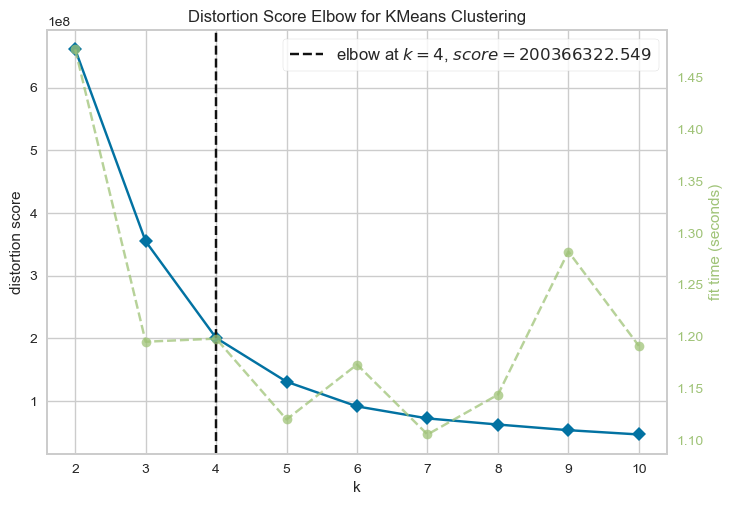

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [13]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

# Assuming 'data' is your DataFrame and 'features_encoded' contains the encoded features

Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(data[features])
Elbow_M.show()

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

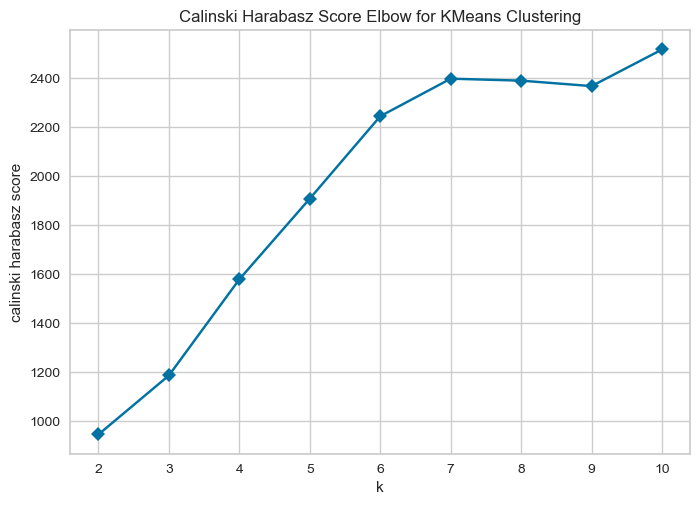

<Axes: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [14]:
Elbow_M = KElbowVisualizer(KMeans(), k=10,metric='calinski_harabasz', timings=False, locate_elbow=False)
Elbow_M.fit(data[features])
Elbow_M.show()

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

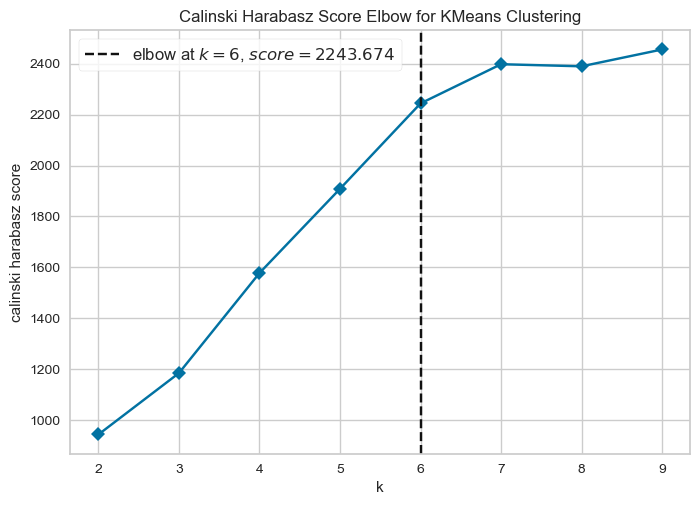

<Figure size 1000x600 with 0 Axes>

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Silhouette Score for KMeans with 6 clusters: 0.4868872934042314


In [15]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.pyplot as plt

# Initialize the KElbowVisualizer
Elbow_M = KElbowVisualizer(KMeans(), k=(2, 10), metric='calinski_harabasz', timings=False)

# Fit the visualizer
Elbow_M.fit(data[features])

# Plot the elbow curve
plt.figure(figsize=(10, 6))
Elbow_M.show()

# Calculate silhouette score for KMeans clustering with optimal K
kmeans = KMeans(n_clusters=Elbow_M.elbow_value_)
cluster_labels = kmeans.fit_predict(data[features])
silhouette_avg = silhouette_score(data[features], cluster_labels)
print(f"Silhouette Score for KMeans with {Elbow_M.elbow_value_} clusters: {silhouette_avg}")


In [16]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(data[features])
    silhouette_avg = silhouette_score(data[features], cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"Silhouette Score for {k} clusters: {silhouette_avg}")

best_k = silhouette_scores.index(max(silhouette_scores)) + 4  # Add 2 because we start from k=2
print(f"Best number of clusters based on silhouette score: {best_k}")

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Silhouette Score for 2 clusters: 0.6775665534199835


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Silhouette Score for 3 clusters: 0.5969863847709079


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Silhouette Score for 4 clusters: 0.5684419413657127


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Silhouette Score for 5 clusters: 0.5031636899098323


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Silhouette Score for 6 clusters: 0.49052754513792945


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Silhouette Score for 7 clusters: 0.47148092677872494


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Silhouette Score for 8 clusters: 0.4600444087223193


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Silhouette Score for 9 clusters: 0.44347660325301935


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Silhouette Score for 10 clusters: 0.4380315256643579
Best number of clusters based on silhouette score: 4


### IMPLEMENTING BEST K

In [17]:
KM = KMeans(n_clusters=4,random_state=32)

### PREDICTING CLUSTERS ON TRAINING DATA FOR ANALYSIS

In [18]:
km_pred = KM.fit_predict(data[features])

data['cluster'] = km_pred.astype(str)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [19]:
data.head()

,Recency,Frequency,Monetary,R_Tertile,F_Tertile,M_Tertile,RFM_Score,segment_name,cluster
16,41,7,661.948,3,2,2,322,POTENTIAL LOYALIST,0
339,92,8,279.943,2,3,1,231,AVERAGE,0
370,41,7,587.171,3,2,1,321,AVERAGE,0
224,22,8,822.898,3,3,2,332,LOYAL,0
733,49,4,816.174,2,1,2,212,ABOUT TO SLEEP,0


In [20]:
# Assuming your DataFrame is named current_data
data.to_csv('data_with clustering number_superstore.csv', index=False)

In [21]:
data.head()

,Recency,Frequency,Monetary,R_Tertile,F_Tertile,M_Tertile,RFM_Score,segment_name,cluster
16,41,7,661.948,3,2,2,322,POTENTIAL LOYALIST,0
339,92,8,279.943,2,3,1,231,AVERAGE,0
370,41,7,587.171,3,2,1,321,AVERAGE,0
224,22,8,822.898,3,3,2,332,LOYAL,0
733,49,4,816.174,2,1,2,212,ABOUT TO SLEEP,0


### ANALYZING CLUSTERS

In [22]:
sum_data = data[list(features)+['cluster']].groupby('cluster').mean()

sum_data

,Frequency,Monetary,Recency
cluster,,,
0,5.502252,584.640431,174.988739
1,8.372881,4350.895951,91.949153
2,6.000000,10957.604800,150.800000
3,7.404878,1992.848959,109.541463


In [23]:
data.groupby('cluster')[features].describe().transpose()

cluster                    0            1             2            3
Frequency count   444.000000    59.000000      5.000000   205.000000
          mean      5.502252     8.372881      6.000000     7.404878
          std       2.290917     2.406158      2.345208     2.300251
          min       1.000000     2.000000      4.000000     2.000000
          25%       4.000000     7.000000      5.000000     6.000000
          50%       5.000000     8.000000      5.000000     7.000000
          75%       7.000000    10.000000      6.000000     9.000000
          max      13.000000    13.000000     10.000000    17.000000
Monetary  count   444.000000    59.000000      5.000000   205.000000
          mean    584.640431  4350.895951  10957.604800  1992.848959
          std     367.974921  1016.027765   1302.655376   491.209982
          min       4.833000  3207.264000   8953.368000  1283.146000
          25%     267.464500  3500.213500  10351.023000  1574.786000
          50%     558.648000  4003.172000  11649.210000  1916.284000
          75%     898.162500  5016.332000  11713.828000  2323.136000
          max    1278.906000  7291.958000  12120.595000  3148.778000
Recency   count   444.000000    59.000000      5.000000   205.000000
          mean    174.988739    91.949153    150.800000   109.541463
          std     210.154447   109.267691    227.925865   140.802861
          min       0.000000     1.000000     41.000000     0.000000
          25%      36.000000    18.500000     43.000000    29.000000
          50%      92.000000    47.000000     43.000000    58.000000
          75%     233.500000   114.500000     69.000000   121.000000
          max    1164.000000   534.000000    558.000000   764.000000

In [24]:
data.groupby('cluster')[features].describe().transpose()

cluster                    0            1             2            3
Frequency count   444.000000    59.000000      5.000000   205.000000
          mean      5.502252     8.372881      6.000000     7.404878
          std       2.290917     2.406158      2.345208     2.300251
          min       1.000000     2.000000      4.000000     2.000000
          25%       4.000000     7.000000      5.000000     6.000000
          50%       5.000000     8.000000      5.000000     7.000000
          75%       7.000000    10.000000      6.000000     9.000000
          max      13.000000    13.000000     10.000000    17.000000
Monetary  count   444.000000    59.000000      5.000000   205.000000
          mean    584.640431  4350.895951  10957.604800  1992.848959
          std     367.974921  1016.027765   1302.655376   491.209982
          min       4.833000  3207.264000   8953.368000  1283.146000
          25%     267.464500  3500.213500  10351.023000  1574.786000
          50%     558.648000  4003.172000  11649.210000  1916.284000
          75%     898.162500  5016.332000  11713.828000  2323.136000
          max    1278.906000  7291.958000  12120.595000  3148.778000
Recency   count   444.000000    59.000000      5.000000   205.000000
          mean    174.988739    91.949153    150.800000   109.541463
          std     210.154447   109.267691    227.925865   140.802861
          min       0.000000     1.000000     41.000000     0.000000
          25%      36.000000    18.500000     43.000000    29.000000
          50%      92.000000    47.000000     43.000000    58.000000
          75%     233.500000   114.500000     69.000000   121.000000
          max    1164.000000   534.000000    558.000000   764.000000

In [25]:
attributes = ['Recency', 'Frequency', 'Monetary', 'R_Tertile', 'F_Tertile',
       'M_Tertile', 'RFM_Score']

In [26]:
data.groupby('cluster')[attributes].describe().transpose()

cluster                    0            1             2            3
Recency   count   444.000000    59.000000      5.000000   205.000000
          mean    174.988739    91.949153    150.800000   109.541463
          std     210.154447   109.267691    227.925865   140.802861
          min       0.000000     1.000000     41.000000     0.000000
          25%      36.000000    18.500000     43.000000    29.000000
          50%      92.000000    47.000000     43.000000    58.000000
          75%     233.500000   114.500000     69.000000   121.000000
          max    1164.000000   534.000000    558.000000   764.000000
Frequency count   444.000000    59.000000      5.000000   205.000000
          mean      5.502252     8.372881      6.000000     7.404878
          std       2.290917     2.406158      2.345208     2.300251
          min       1.000000     2.000000      4.000000     2.000000
          25%       4.000000     7.000000      5.000000     6.000000
          50%       5.000000     8.000000      5.000000     7.000000
          75%       7.000000    10.000000      6.000000     9.000000
          max      13.000000    13.000000     10.000000    17.000000
Monetary  count   444.000000    59.000000      5.000000   205.000000
          mean    584.640431  4350.895951  10957.604800  1992.848959
          std     367.974921  1016.027765   1302.655376   491.209982
          min       4.833000  3207.264000   8953.368000  1283.146000
          25%     267.464500  3500.213500  10351.023000  1574.786000
          50%     558.648000  4003.172000  11649.210000  1916.284000
          75%     898.162500  5016.332000  11713.828000  2323.136000
          max    1278.906000  7291.958000  12120.595000  3148.778000
R_Tertile count   444.000000    59.000000      5.000000   205.000000
          mean      1.907658     2.203390      2.000000     2.102439
          std       0.827319     0.804720      0.707107     0.788548
          min       1.000000     1.000000      1.000000     1.000000
          25%       1.000000     2.000000      2.000000     1.000000
          50%       2.000000     2.000000      2.000000     2.000000
          75%       3.000000     3.000000      2.000000     3.000000
          max       3.000000     3.000000      3.000000     3.000000
F_Tertile count   444.000000    59.000000      5.000000   205.000000
          mean      1.646396     2.457627      1.600000     2.229268
          std       0.794286     0.726874      0.894427     0.761270
          min       1.000000     1.000000      1.000000     1.000000
          25%       1.000000     2.000000      1.000000     2.000000
          50%       1.000000     3.000000      1.000000     2.000000
          75%       2.000000     3.000000      2.000000     3.000000
          max       3.000000     3.000000      3.000000     3.000000
M_Tertile count   444.000000    59.000000      5.000000   205.000000
          mean      1.470721     3.000000      3.000000     2.892683
          std       0.499705     0.000000      0.000000     0.310274
          min       1.000000     3.000000      3.000000     2.000000
          25%       1.000000     3.000000      3.000000     3.000000
          50%       1.000000     3.000000      3.000000     3.000000
          75%       2.000000     3.000000      3.000000     3.000000
          max       2.000000     3.000000      3.000000     3.000000
RFM_Score count   444.000000    59.000000      5.000000   205.000000
          mean    208.700450   247.915254    219.000000   235.429268
          std      85.101203    80.908055     77.974355    80.991776
          min     111.000000   113.000000    113.000000   113.000000
          25%     112.000000   213.000000    213.000000   133.000000
          50%     212.000000   233.000000    213.000000   233.000000
          75%     311.000000   328.000000    223.000000   323.000000
          max     332.000000   333.000000    333.000000   333.000000

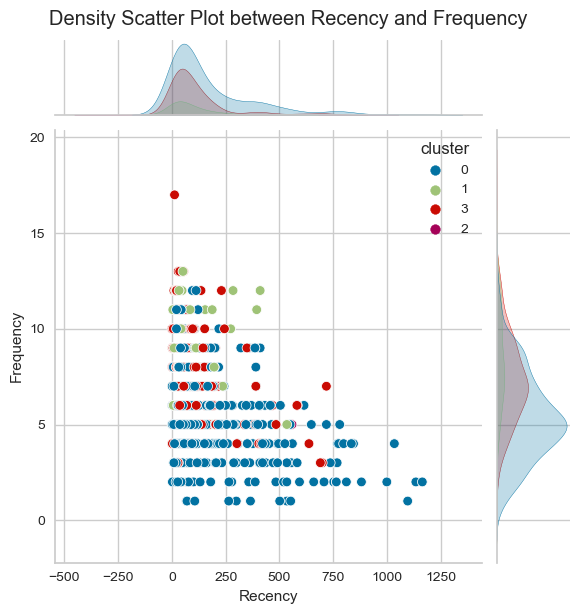

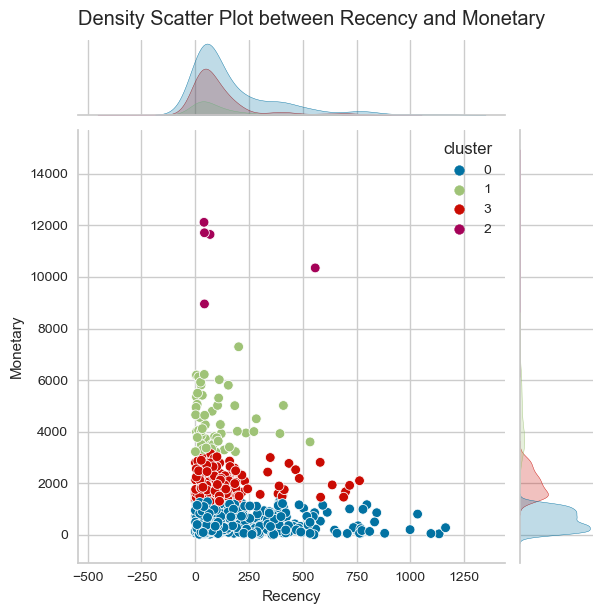

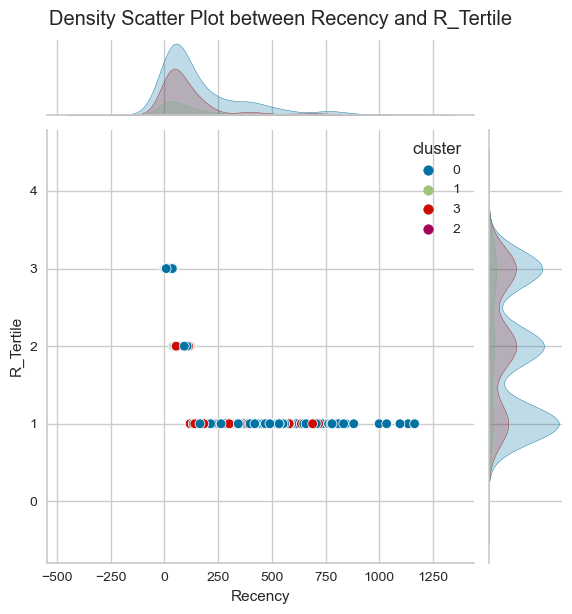

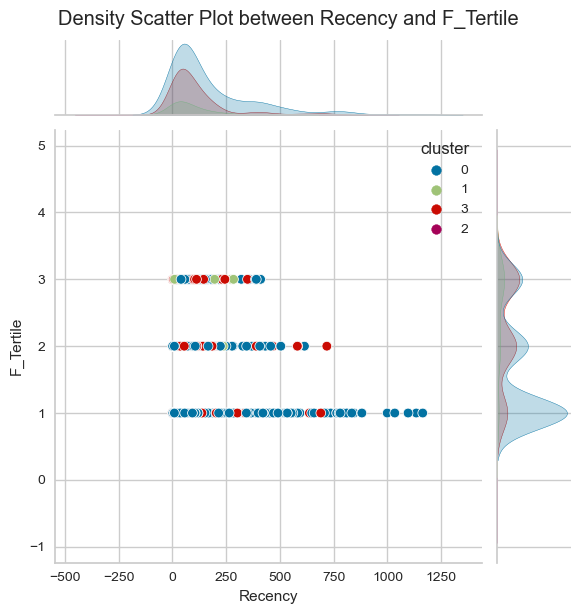

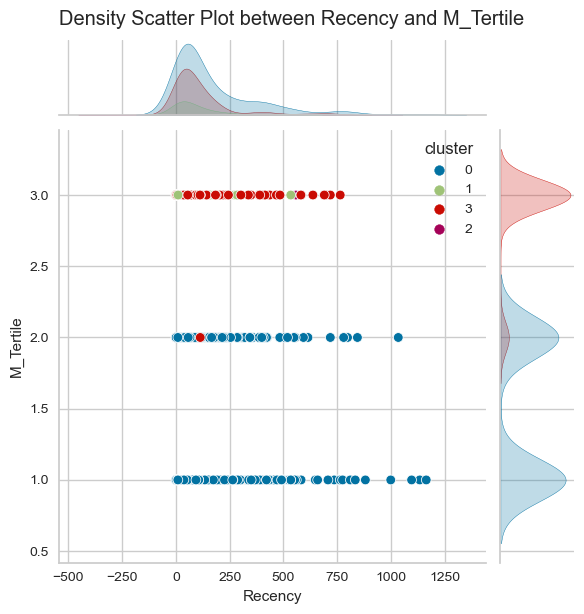

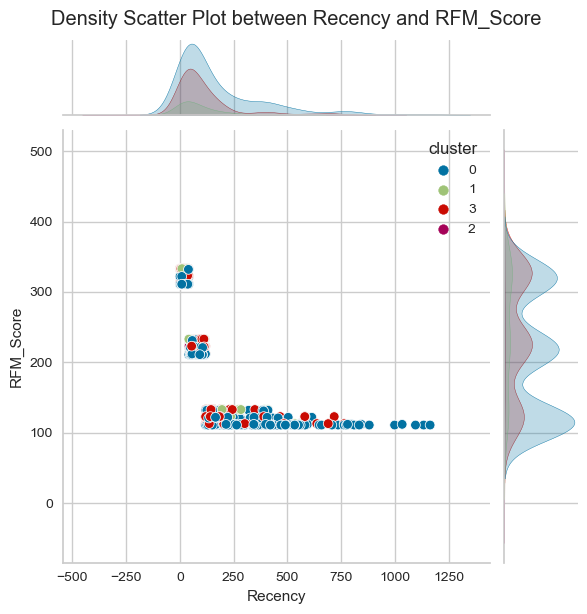

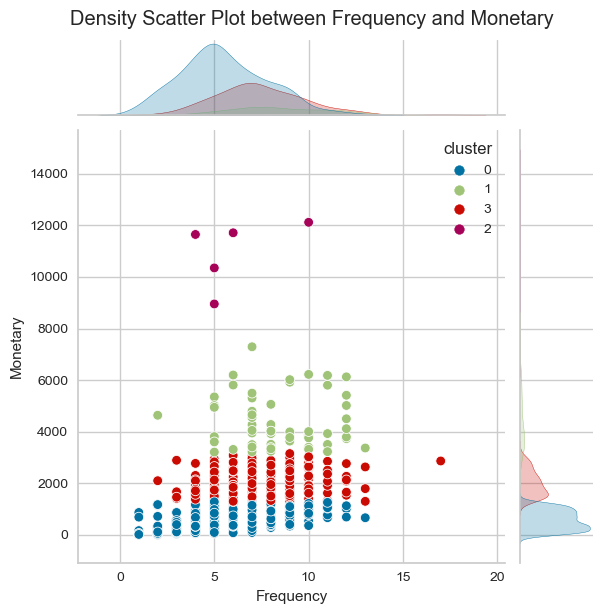

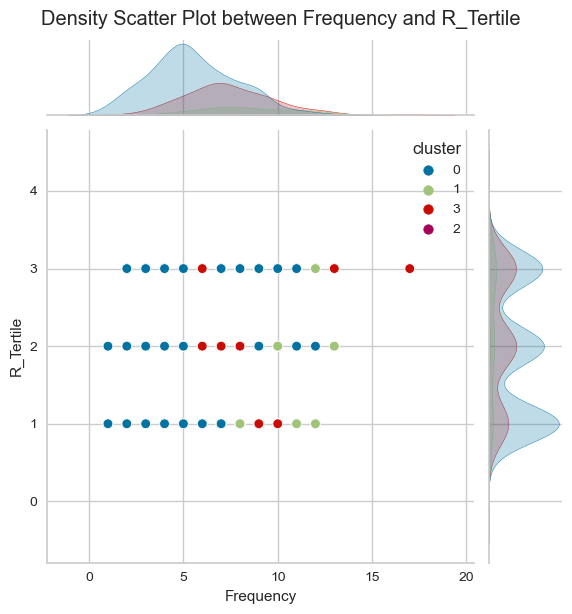

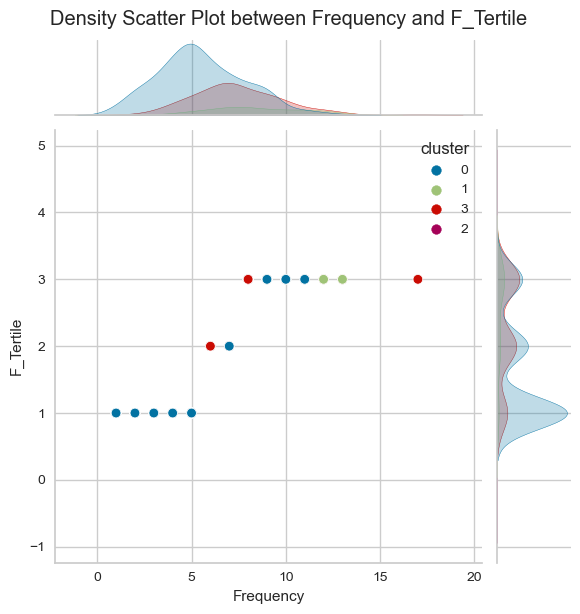

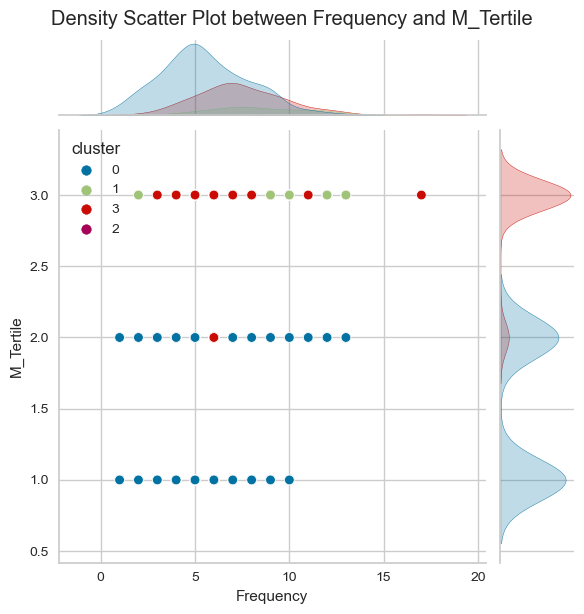

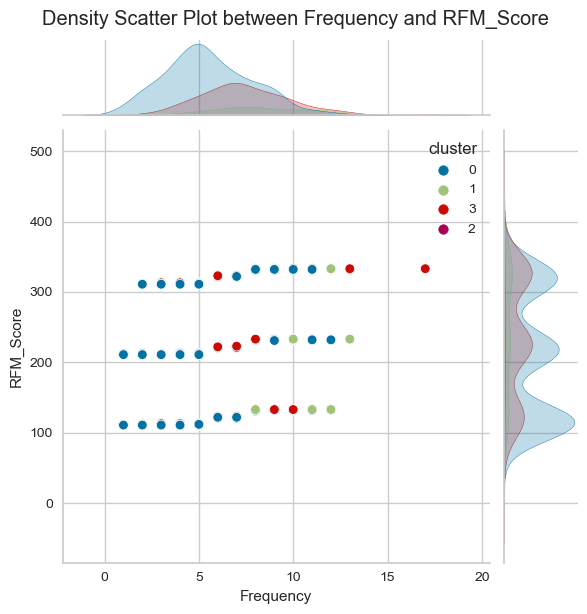

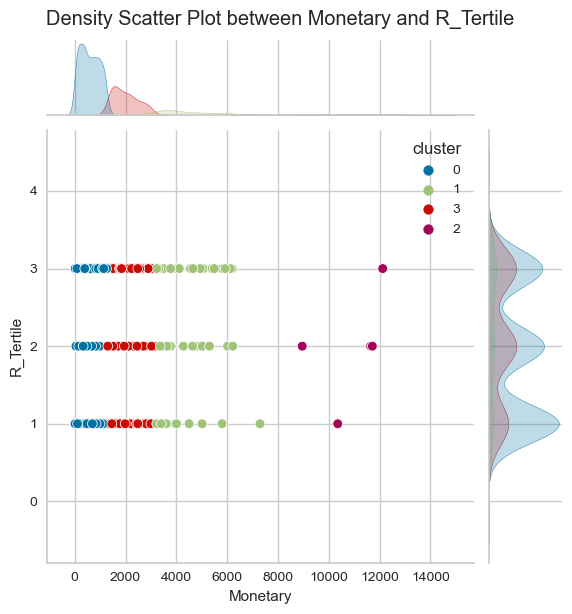

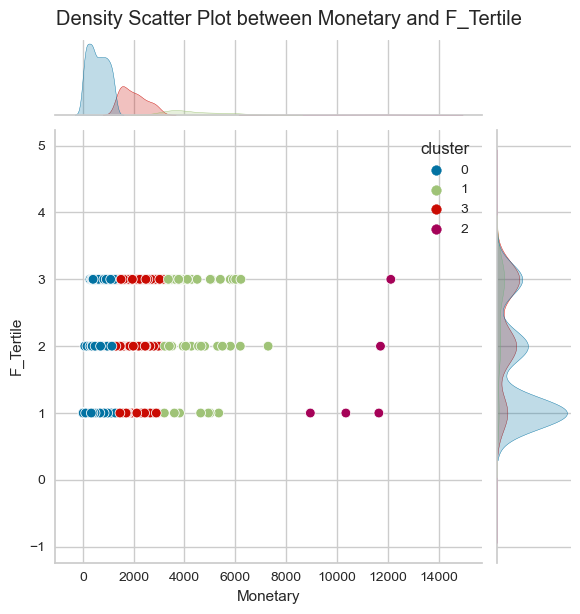

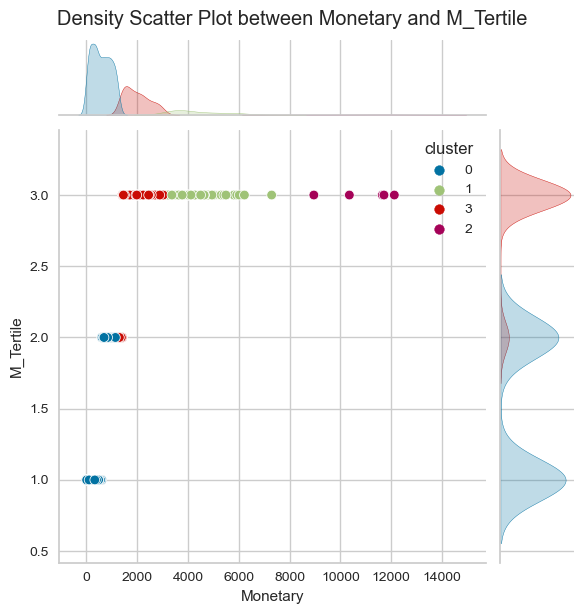

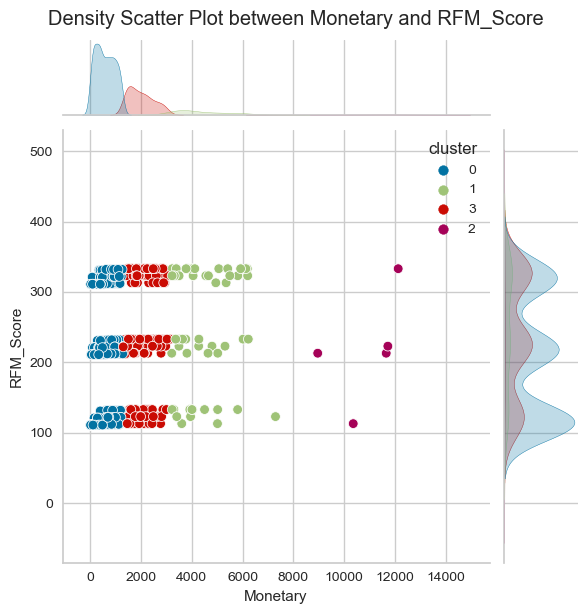

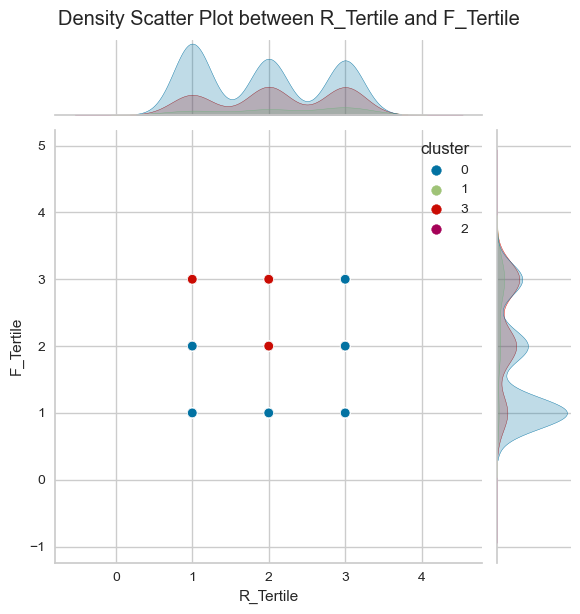

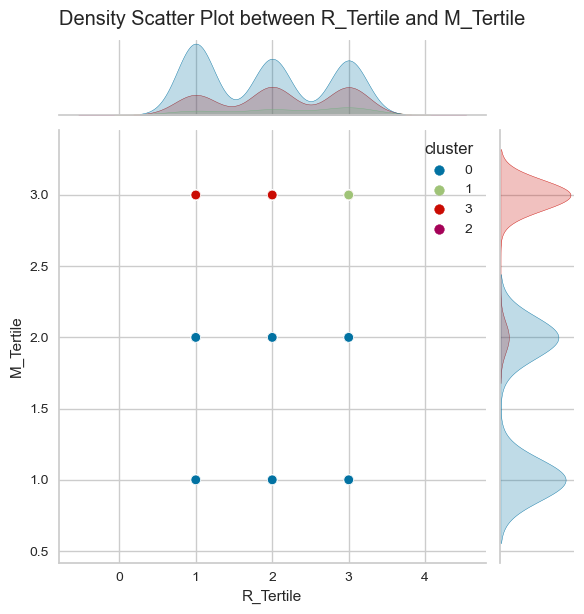

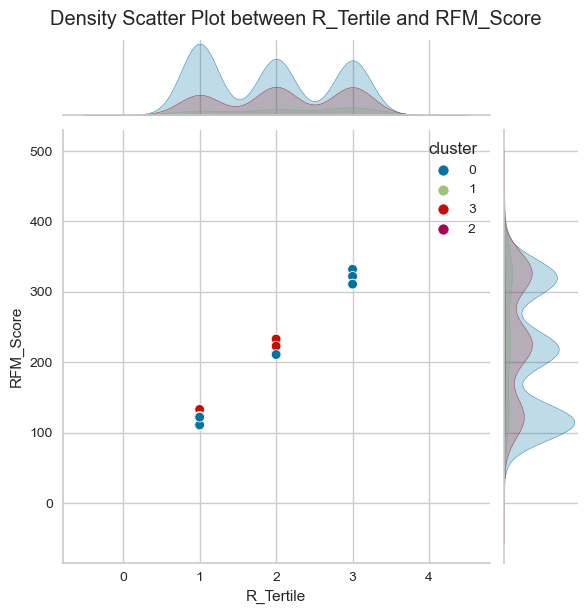

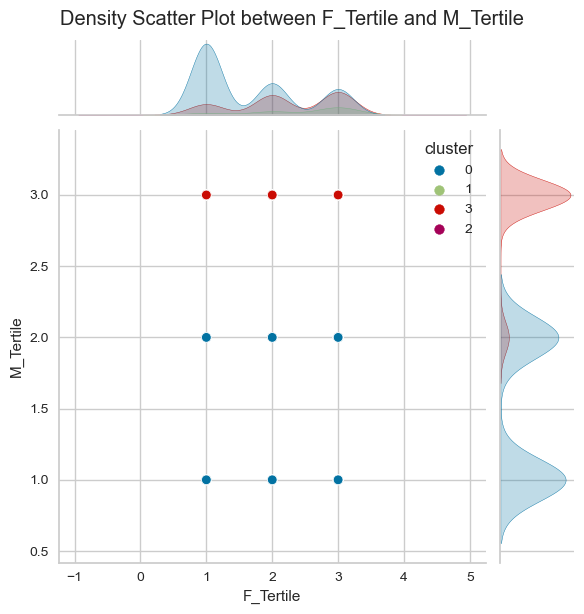

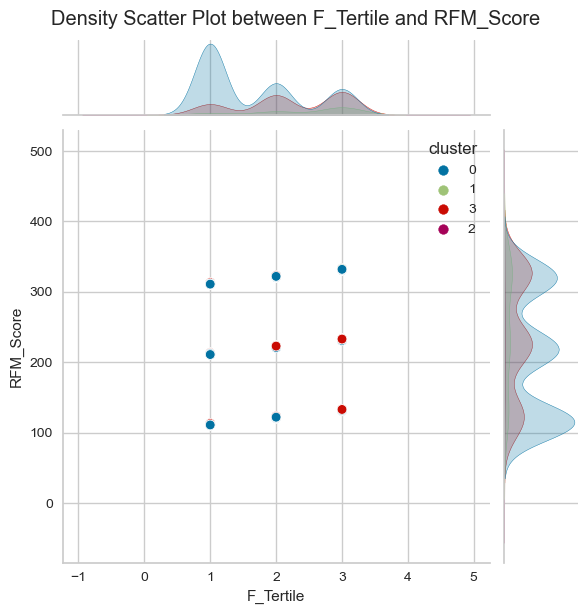

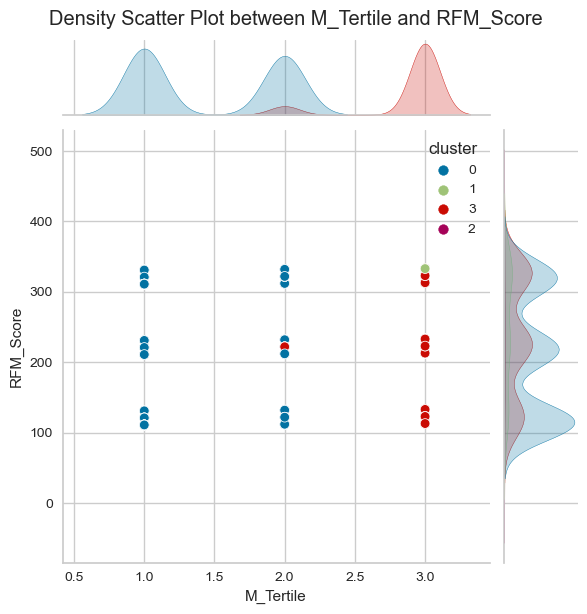

In [27]:
# Create a jointplot for each pair of features
for i, var1 in enumerate(attributes):
    for j, var2 in enumerate(attributes):
        if i < j:  # To avoid duplicate plots 
            sns.jointplot(x=var1, y=var2, data=data, kind='scatter',hue='cluster')
            plt.suptitle(f'Density Scatter Plot between {var1} and {var2}', y=1.02)
            plt.show()

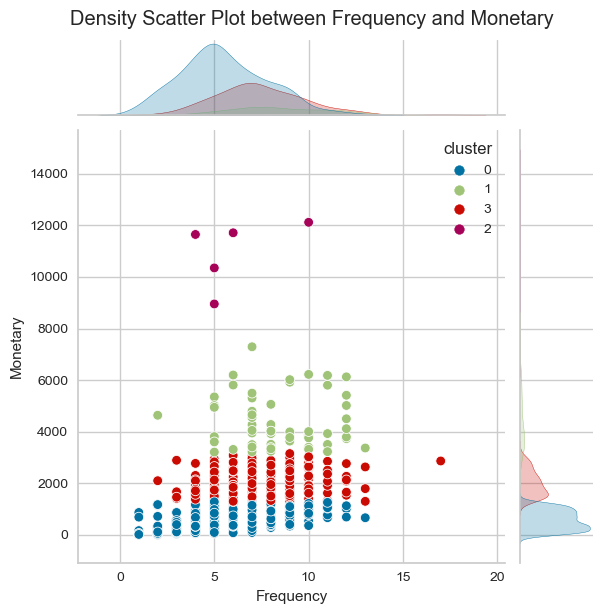

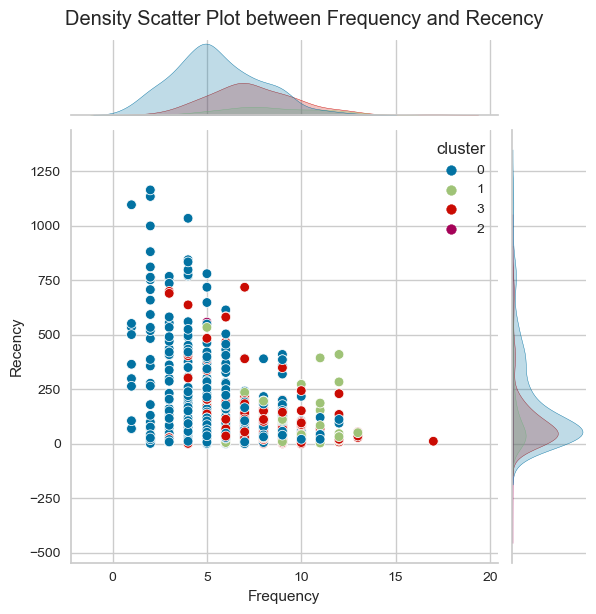

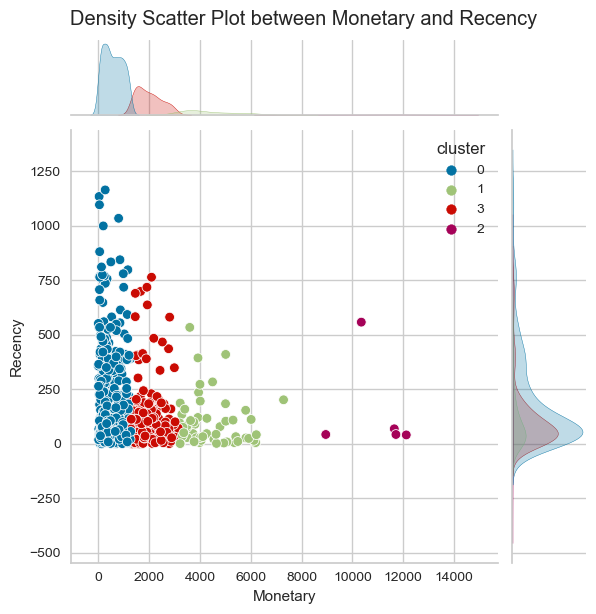

In [28]:
# Create a jointplot for each pair of features
for i, var1 in enumerate(features):
    for j, var2 in enumerate(features):
        if i < j:  # To avoid duplicate plots 
            sns.jointplot(x=var1, y=var2, data=data, kind='scatter',hue='cluster')
            plt.suptitle(f'Density Scatter Plot between {var1} and {var2}', y=1.02)
            plt.show()

# Detailed Interpretation with Recommendation

### Cluster Interpretation

In [29]:
data

,Recency,Frequency,Monetary,R_Tertile,F_Tertile,M_Tertile,RFM_Score,segment_name,cluster
16,41,7,661.948,3,2,2,322,POTENTIAL LOYALIST,0
339,92,8,279.943,2,3,1,231,AVERAGE,0
370,41,7,587.171,3,2,1,321,AVERAGE,0
224,22,8,822.898,3,3,2,332,LOYAL,0
733,49,4,816.174,2,1,2,212,ABOUT TO SLEEP,0
...,...,...,...,...,...,...,...,...,...
715,491,3,108.390,1,1,1,111,LOST CUSTOMER,0
767,55,7,2450.632,2,2,3,223,POTENTIAL LOYALIST,3
72,9,3,395.320,3,1,1,311,RECENT CUSTOMER,0
235,93,4,331.240,2,1,1,211,ABOUT TO SLEEP,0


# Interpretation By Cluster

### Interpretation to Recommendation

### Predicting New Clusters

In [30]:
data_test.reset_index(drop=True)

,Recency,Frequency,Monetary,R_Tertile,F_Tertile,M_Tertile,RFM_Score,segment_name
0,25,8,568.7520,3,3,1,331,POTENTIAL LOYALIST
1,30,4,52.0680,3,1,1,311,RECENT CUSTOMER
2,26,12,774.5960,3,3,2,332,LOYAL
3,72,7,2885.4160,2,2,3,223,POTENTIAL LOYALIST
4,296,9,869.0420,1,3,2,132,CANNOT LOOSE THEM
...,...,...,...,...,...,...,...,...
75,175,1,198.4600,1,1,1,111,LOST CUSTOMER
76,193,5,635.2520,1,1,2,112,ABOUT TO SLEEP
77,13,10,3200.9920,3,3,3,333,CHAMPION
78,55,6,1064.1580,2,2,2,222,AVERAGE


In [31]:
test_val= data_test.reset_index(drop=True).query('index==0')

test_val.T

,0
Recency,25
Frequency,8
Monetary,568.752
R_Tertile,3
F_Tertile,3
M_Tertile,1
RFM_Score,331
segment_name,POTENTIAL LOYALIST


In [32]:
print( 'Predicted Cluster is:', KM.predict(test_val[features])[0])

Predicted Cluster is: 0
